<!-- Main Container -->
<div style="background-color: #f0f8ff; padding: 20px; border-radius: 8px; margin-bottom: 20px;">
    <!-- Main Heading -->
    <div style="background-color: #004080; padding: 20px; border-radius: 8px; border: 2px solid #004080; margin-bottom: 20px;">
        <h1 style="color: #ffffff; font-weight: bold; text-align: center; font-size: 24px;">Airline On-Time Arrival Performance Analysis for Domestic Flights in March 2024</h1>
    </div>
    <!-- Subheading for Course Information -->
    <h2 style="color: #000080; font-weight: bold; text-align: center;">CAP 2761C - Intermediate Analytics</h2>
    <h3 style="color: #000080; font-weight: bold; text-align: center;">Professor: Pedro Vargas Garces</h3>
    <!-- Student Names -->
    <p style="color: #0047AB; font-size: 16px; text-align: center;">Carlos C. Gomez</p>
    <p style="color: #0047AB; font-size: 16px; text-align: center;">Matthew Mullin</p>
    <!-- Date -->
    <p style="color: #0047AB; font-weight: bold; text-align: center; margin-top: 30px;">Date: 6/13/2024</p>
</div>






<!-- Main Container for Heading -->
<div style="background-color: #004080; padding: 10px; border-radius: 8px; margin-bottom: 20px; text-align: center;">
<h2 style="color: #ffffff; font-weight: bold; font-size: 20px; margin: 0;">1. The Dataset</h2>
</div>

<div style="background-color: #f0f8ff; padding: 20px; border-radius: 8px; margin-bottom: 20px;">
    <ol style="color: #000000; font-size: 16px;">
        The data used in this analysis is sourced from the Bureau of Transportation Statistics (BTS). The BTS tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled, and diverted flights appears in the monthly Air Travel Consumer Report, published about 30 days after the month’s end. For more details, please visit the Bureau of Transportation Statistics <a href="https://www.transtats.bts.gov/OT_Delay/OT_DelayCause1.asp" target="_blank" style="color: #800000; text-decoration: none;">website</a>.
    </ol>
</div>


<!-- Main Container for Heading -->
<div style="background-color: #004080; padding: 10px; border-radius: 8px; margin-bottom: 20px; text-align: center;">
<h2 style="color: #ffffff; font-weight: bold; font-size: 20px; margin: 0;">2. Setting Up the Environment</h2>
</div>

<!-- Main Container -->
<div style="background-color: #f0f8ff; padding: 20px; border-radius: 8px; margin-bottom: 20px;">
    <p style="color: #800000; font-size: 16px; font-weight: bold;text-align: center;">Step 1: Create Database in SQL Server Management Studio (SMSS)</p>
    <p style="color: #000080; font-size: 16px;">
        Follow these sub-steps to create and set up your database:
    </p>
    <ol style="color: #000080; font-size: 16px;">
        <li>Create a database named <code>FlightDelays</code> (case sensitive) in SMSS.</li>
        <li>Load the flat file <strong>[FlightsTable.csv]</strong> found in the same folder as this notebook.</li>
        <li>Name the table <code>Flights</code> (case sensitive).</li>
        <li>Ensure the table structure and character types are as shown below:</li>
    </ol>
</div>

<!-- Main Container for Character Types Image -->
<div style="background-color: #f0f8ff; padding: 20px; border-radius: 8px; margin-bottom: 20px;">
    <p style="color: #000000; font-size: 16px;">Character Types:</p>

  

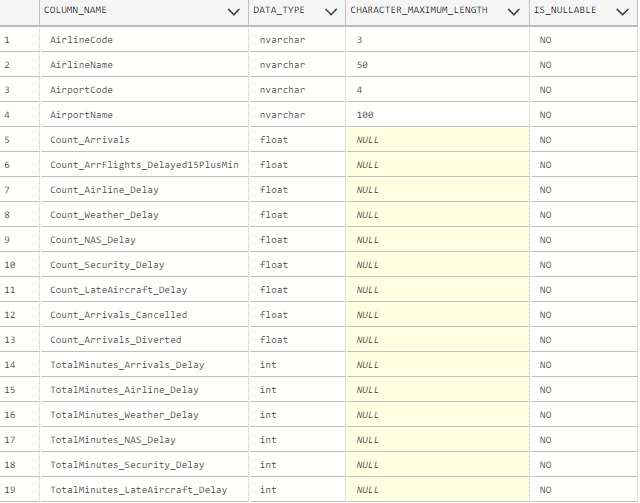

</div>

<!-- Main Container -->
<div style="background-color: #f0f8ff; padding: 20px; border-radius: 8px; margin-bottom: 20px;">
    <p style="color: #800000; font-size: 16px; font-weight: bold;">Step 2: Connect to the Database</p>
    <p style="color: #000080; font-size: 16px;">
        Use the <code>USE</code> statement to set the context for the FlightsDelay database and connect it to the one you created in SMSS:
    </p>
    <pre style="background-color: #ffffff; padding: 10px; border: 1px solid #004080; border-radius: 8px; color: #000080; font-size: 16px;">
USE FlightDelays;
    </pre>
</div>




In [9]:
USE FlightDelays; 

-- The drop table statements are in case the user wants to recurse through the process


-- Drop AirlineAssociations table if it exists
IF OBJECT_ID('dbo.AirlineAssociations', 'U') IS NOT NULL 
    DROP TABLE dbo.AirlineAssociations;


-- Drop AirlineMetrics table if it exists
IF OBJECT_ID('dbo.AirlineMetrics', 'U') IS NOT NULL 
    DROP TABLE dbo.AirlineMetrics;






Commands completed successfully.

Total execution time: 00:00:00

<!-- Main Container -->
<div style="background-color: #f0f8ff; padding: 20px; border-radius: 8px; margin-bottom: 20px;">
    <p style="color: #800000; font-size: 16px; font-weight: bold;">Step 3: Create the AirlineAssociations Table</p>
    <p style="color: #000080; font-size: 16px;">
        In the cell below, we use the following SQL statement to create the <code>AirlineAssociations</code> table with the necessary columns to store airline code, name, operating brand, and marketing airline:
    </p>
    <pre style="background-color: #ffffff; padding: 10px; border: 1px solid #004080; border-radius: 8px; color: #000080; font-size: 16px;">
CREATE TABLE FlightDelays.dbo.AirlineAssociations
(
    AirlineCode NVARCHAR(10),
    AirCarrier NVARCHAR(100) NOT NULL,
    OperatingBrand NVARCHAR(100) NOT NULL,
    MarketingAirline NVARCHAR(100) NOT NULL
);
    </pre>
    <p style="color: #000000; font-size: 16px;">
        The <code>AirlineAssociations</code> table is designed to consolidate airline data, reduce redundancy, and facilitate easier analysis of flight delay information. By associating various carriers with their marketing airlines, we can streamline data queries and reports.
    </p>
</div>


In [10]:
CREATE TABLE FlightDelays.dbo.AirlineAssociations
    (
        AirlineCode NVARCHAR(3),
        AirCarrier NVARCHAR(50) NOT NULL,
        CarrierBrand NVARCHAR(50) NOT NULL,
        MarketingAirline NVARCHAR(50) NOT NULL
    );

-- Insert relationship data into AirlineAssociations table
INSERT INTO FlightDelays.dbo.AirlineAssociations (AirlineCode, AirCarrier, CarrierBrand, MarketingAirline)
VALUES 
    -- American Airlines Group
    ('AA', 'American Airlines', 'American Airlines', 'American Airlines Group'),
    ('YX', 'Republic Airline', 'American Eagle', 'American Airlines Group'),
    ('MQ', 'Envoy Air', 'American Eagle', 'American Airlines Group'),
    ('OH', 'PSA Airlines', 'American Eagle', 'American Airlines Group'),
    ('PT', 'Piedmont Airlines', 'American Eagle', 'American Airlines Group'),
    ('YV', 'Mesa Airlines Inc.', 'American Eagle', 'American Airlines Group'),

    -- United Airlines Group
    ('UA', 'United Airlines', 'United Airlines', 'United Airlines Group'),
    ('OO', 'SkyWest Airlines Inc.', 'United Express', 'United Airlines Group'),
    ('C5', 'CommuteAir LLC', 'United Express', 'United Airlines Group'),
    ('ZW', 'Air Wisconsin Airlines Corp', 'United Express', 'United Airlines Group'),
    ('G7', 'GoJet Airlines LLC', 'United Express', 'United Airlines Group'),

    -- Delta Air Lines Group
    ('DL', 'Delta Air Lines', 'Delta Air Lines', 'Delta Air Lines Group'),
    ('OO', 'SkyWest Airlines Inc.', 'Delta Connection', 'Delta Air Lines Group'),
    ('9E', 'Endeavor Air Inc.', 'Delta Connection', 'Delta Air Lines Group'),

    -- Southwest Airlines
    ('WN', 'Southwest Airlines', 'Southwest Airlines', 'Southwest Airlines'),

    -- Alaska Airlines Group
    ('AS', 'Alaska Airlines', 'Alaska Airlines', 'Alaska Airlines Group'),
    ('QX', 'Horizon Air', 'Alaska Airlines', 'Alaska Airlines Group'),

    -- Spirit Airlines
    ('NK', 'Spirit Airlines', 'Spirit Airlines', 'Spirit Airlines'),

    -- JetBlue Airways
    ('B6', 'JetBlue Airways', 'JetBlue Airways', 'JetBlue Airways'),

    -- Frontier Airlines
    ('F9', 'Frontier Airlines', 'Frontier Airlines', 'Frontier Airlines'),

    -- Allegiant Air
    ('G4', 'Allegiant Air', 'Allegiant Air', 'Allegiant Air'),

    -- Hawaiian Airlines
    ('HA', 'Hawaiian Airlines', 'Hawaiian Airlines', 'Hawaiian Airlines');


(22 rows affected)

Total execution time: 00:00:00.008

<!-- Main Container -->
<div style="background-color: #f0f8ff; padding: 20px; border-radius: 8px; margin-bottom: 20px;">
    <p style="color: #800000; font-size: 16px; font-weight: bold;">Step 4: Create the AirlineMetrics Table</p>
    <p style="color: #000080; font-size: 16px;">
        In the cell below, we use the following SQL statement to create the <code>AirlineMetrics</code> table and then polulate it:
    </p>
    <pre style="background-color: #ffffff; padding: 10px; border: 1px solid #004080; border-radius: 8px; color: #000080; font-size: 16px;">
CREATE TABLE FlightDelays.dbo.AirlineMetrics
(
    MarketingAirline NVARCHAR(50),
    TotalFlights INT,
    OnTimeFlights INT,
    DelayedFlights INT,
    DelayPercentage DECIMAL(5,2),
    OnTimePercentage DECIMAL(5,2)
);
    </pre>
</div>


In [11]:
CREATE TABLE FlightDelays.dbo.AirlineMetrics 
    (
        MarketingAirline NVARCHAR(50),   -- The name of the marketing airline
        TotalFlights INT,                 -- Total number of flights
        OnTimeFlights INT,                -- Total number of on-time flights
        DelayedFlights INT,               -- Total number of delayed flights
        DelayPercentage DECIMAL(5,2),     -- Percentage of delayed flights
        OnTimePercentage DECIMAL(5,2)     -- Percentage of on-time flights
    );

-- 2. INSERT AGGREGATED DATA INTO AIRLINE METRICS TABLE
INSERT INTO FlightDelays.dbo.AirlineMetrics (MarketingAirline, TotalFlights, OnTimeFlights, DelayedFlights, DelayPercentage, OnTimePercentage)
SELECT 
    aa.MarketingAirline,
    SUM(f.Count_Arrivals) AS TotalFlights,
    SUM(f.Count_Arrivals - f.Count_ArrFlights_Delayed15PlusMin) AS OnTimeFlights,
    SUM(f.Count_ArrFlights_Delayed15PlusMin) AS DelayedFlights,
    
    -- Calculate Delay Percentage
    CAST((SUM(f.Count_ArrFlights_Delayed15PlusMin) * 100.0 / SUM(f.Count_Arrivals)) AS DECIMAL(5,2)) AS DelayPercentage,
    
    -- Calculate On-Time Percentage
    CAST((SUM(f.Count_Arrivals - f.Count_ArrFlights_Delayed15PlusMin) * 100.0 / SUM(f.Count_Arrivals)) AS DECIMAL(5,2)) AS OnTimePercentage

FROM 
    FlightDelays.dbo.Flights f

JOIN 
    FlightDelays.dbo.AirlineAssociations aa 
            ON f.AirlineCode = aa.AirlineCode
GROUP BY 
    aa.MarketingAirline
ORDER BY 
    TotalFlights DESC;


(10 rows affected)

Total execution time: 00:00:00.013

<!-- Main Container for Analysis and Visualizations Heading -->
<div style="background-color: #004080; padding: 10px; border-radius: 8px; margin-bottom: 20px; text-align: center;">
<h2 style="color: #ffffff; font-weight: bold; font-size: 20px; margin: 0;">3. Analysis and Visualizations</h2>
</div>

<!--1. Main Container for Visualization Index -->
<div id="visualization1" style="background-color: #f0f8ff; padding: 15px; border-radius: 8px; margin-bottom: 20px; border: 2px solid #004080;">
<p style="color: #000000; font-size: 16px;">
The following visualizations provide an in-depth analysis of airline on-time arrival performance for domestic flights in March 2024. The analysis is divided into three main sections:
</p>

<!-- National Airline Performance Overview -->
<h3 style="color: #228B22; font-weight: bold;">A. National Airline Performance Overview</h3>
<p style="color: #000000; font-size: 16px;">


<h3 style="color: #228B22; font-weight: bold; margin-top: 20px;">B. Miami Metropolitan Area Airports (MIA, FLL, PBI) </h3>
<p style="color: #000000; font-size: 16px;">


<h3 style="color: #228B22; font-weight: bold; margin-top: 20px;">C. Miami International Airport (MIA)</h3>
<p style="color: #000000; font-size: 16px;">



<!-- Main Container for Analysis and Visualizations Heading -->
<div style="background-color: #228B22; padding: 10px; border-radius: 8px; margin-bottom: 20px; text-align: center;">
<h2 style="color: #ffffff; font-weight: bold; font-size: 20px; margin: 0;">A. National Airline Performance Review</h2>
</div>

<p style="color: #000000; font-size: 16px;">
This section provides visualizations for a broad overview of the domestic carriers in the United States and their "On-Time Arrival" statistics. The first visualization is a table showing the relationships between US domestic carriers that report to the Bureau of Transportation Statistics (BTS). This table illustrates the individual carriers, their co-branding relationships (such as regional carriers branded as American Eagle, Delta Connection, or United Express), and their associations with major airline groups. The second visualization is a pie chart depicting the percentage of on-time arrivals versus delayed flights (arrivals 15+ minutes after the scheduled time). The third visualization is a donut chart detailing the various reasons for delayed arrivals nationwide.
</p>



<!-- Section Container -->
<div style="background-color: #f0f8ff; padding: 20px; border-radius: 8px; margin-bottom: 20px;">

<!-- Main Heading -->
<h1 style="color: #004080; font-weight: bold; 
text-align: center; margin-top: 20px; font-size: 24px;">
Proportions of On-Time  and Late Arrivals<br>
<em style="font-style: italic; font-family: 'Courier New', Courier, monospace;">All US Airports(March 2024)</em>
</h1>

</div>



In [12]:
-- 1. Pie Chart of On-Time and Late Arrivals for March 2024

/* Use WITH Clause to make the query more readable and use a top-down method */

-- SUM: Calculate total flights and late flights
WITH TotalFlights AS (
    -- Total Arrivals: Sum of all arrivals to get the total number of flights
    SELECT SUM(Count_Arrivals) AS TotalArrivals
    FROM FlightDelays.dbo.Flights
),
LateFlights AS (
    -- Late Arrivals: Sum of all arrivals that were delayed by 15 or more minutes
    SELECT SUM(Count_ArrFlights_Delayed15PlusMin) AS LateArrivals
    FROM FlightDelays.dbo.Flights
)

-- PERCENTAGES: Select the percentage of on-time and late flights
SELECT
    'On Time Arrival' AS Status, 
    -- Calculate the percentage of on-time flights
    FORMAT((TotalArrivals - LateArrivals) * 100.0 / TotalArrivals, 'N1') AS Percentage
FROM 
    TotalFlights, 
    LateFlights
UNION ALL -- Combine the results of on-time and late percentages in one result set

SELECT 
    'Late Arrival (15+ Minutes After Scheduled)' AS Status, 
    -- Calculate the percentage of late flights
    FORMAT(LateArrivals * 100.0 / TotalArrivals, 'N1') AS Percentage
FROM 
    TotalFlights, 
    LateFlights;


(2 rows affected)

Total execution time: 00:00:00.228

Status,Percentage
On Time Arrival,79.8
Late Arrival (15+ Minutes After Scheduled),20.2


<!-- Section Container -->
<div style="background-color: #f0f8ff; padding: 20px; border-radius: 8px; margin-bottom: 20px;">

<!-- Main Heading -->
<h1 style="color: #004080; font-weight: bold; 
text-align: center; margin-top: 20px; font-size: 24px;">
Proportions For Main Causes of Domestic Flight Delayed Arrivals<br>
<em style="font-style: italic; font-family: 'Courier New', Courier, monospace;">All US Airports(March 2024)</em>
</h1>

</div>





In [13]:
-- 2. Donut Chart: Distribution of "Causes for Delays" with Counts and Percentages (All US Aiport, March 2024)

-- STEP 1: WITH Clause - Create the Common Table Expession

WITH DelayCauses AS (

-- Circumstances Within The Control of the Airline (e.g., Maintenance, Late Crew, Aircraft Cleaning, Baggage, Fueling, etc.)
    SELECT 
        'Circumstances Within The Control of the Airline (i.e Maintenance, Late Crew, Aircraft Cleaning, Baggage, Fueling, etc.)' AS Cause, 
        SUM(FlightDelays.dbo.Flights.Count_Airline_Delay) AS DelayCount 
    FROM 
        FlightDelays.dbo.Flights
    UNION ALL


 -- Extreme Weather (Actual or Forecasted)
    SELECT 
        'Extreme Weather (Actual or Forecasted)' AS Cause, 
        SUM(FlightDelays.dbo.Flights.Count_Weather_Delay) AS DelayCount 
    FROM 
        FlightDelays.dbo.Flights
    UNION ALL


 -- National Aviation System Delay (e.g., heavy volume, airport operations, air traffic control)
    SELECT 
        'National Aviation System Delay, such as heavy volume, airport operations, and air traffic control' AS Cause, 
        SUM(FlightDelays.dbo.Flights.Count_NAS_Delay) AS DelayCount 
    FROM 
        FlightDelays.dbo.Flights
    UNION ALL


 -- Security Delays (e.g., security breaches, inoperative screening equipment, long lines in screening areas)
    SELECT 
        'Security (Security breaches, inoperative screening equipment, lines >29 minutes in screening areas)' AS Cause, 
        SUM(FlightDelays.dbo.Flights.Count_Security_Delay) AS DelayCount 
    FROM 
        FlightDelays.dbo.Flights
    UNION ALL


 -- Previous Flight on Same Aircraft Arrived Late
    SELECT 
        'Previous Flight on Same Aircraft Arrived Late' AS Cause, 
        SUM(FlightDelays.dbo.Flights.Count_LateAircraft_Delay) AS DelayCount 
    FROM 
        FlightDelays.dbo.Flights
    UNION ALL


 -- Cancelled Flights
    SELECT 
        'Cancelled' AS Cause, 
        SUM(FlightDelays.dbo.Flights.Count_Arrivals_Cancelled) AS DelayCount 
    FROM 
        FlightDelays.dbo.Flights
    UNION ALL


 -- Diverted Flights
    SELECT 
        'Diverted' AS Cause, 
        SUM(FlightDelays.dbo.Flights.Count_Arrivals_Diverted) AS DelayCount 
    FROM 
        FlightDelays.dbo.Flights
)


--STEP 2:  MAIN SELECT STATEMENT 

-- Select and calculate the percentage of each delay cause
SELECT 
    Cause, -- Description of the cause for each delay
    DelayCount, -- Total number of delays per cause category

    /* 
    Calculate the percentage of each delay cause:
    Divide DelayCount by the total delays (SUM(DelayCount)) and multiply by 100
    */
    CAST(
        (DelayCount * 100.0 / SUM(DelayCount) OVER ()) 
        AS DECIMAL(5, 2)
    ) AS Percentage
FROM 
    DelayCauses
ORDER BY 
    DelayCount DESC; -- Order by the number of delays in descending order


(7 rows affected)

Total execution time: 00:00:00.015

Cause,DelayCount,Percentage
Previous Flight on Same Aircraft Arrived Late,48092.5900516063,35.90
"Circumstances Within The Control of the Airline (i.e Maintenance, Late Crew, Aircraft Cleaning, Baggage, Fueling, etc.)",37666.5899305027,28.12
"National Aviation System Delay, such as heavy volume, airport operations, and air traffic control",37595.8900164254,28.07
Cancelled,5377,4.01
Extreme Weather (Actual or Forecasted),3502.089995443821,2.61
Diverted,1329,0.99
"Security (Security breaches, inoperative screening equipment, lines >29 minutes in screening areas)",391.31000011600554,0.29



<!-- Section Container -->
<div style="background-color: #f0f8ff; padding: 20px; border-radius: 8px; margin-bottom: 20px;">

<!-- Main Heading -->
<h1 style="color: #004080; font-weight: bold; 
text-align: center; margin-top: 20px; font-size: 24px;">
Relationships between US Domestic AirCarriers and Airline Groups<br>
<em style="font-style: italic; font-family: 'Courier New', Courier, monospace;">(March 2024)</em>
</h1>


In [14]:
-- 3. Table of Relationships betweeen Airline Carriers, Carrier Brands, and Marketing Airlne

SELECT      
    AirCarrier,  
    CarrierBrand,
    MarketingAirline                    
FROM FlightDelays.dbo.AirlineAssociations
ORDER BY CarrierBrand; 

(22 rows affected)

Total execution time: 00:00:00.009

AirCarrier,CarrierBrand,MarketingAirline
Alaska Airlines,Alaska Airlines,Alaska Airlines Group
Horizon Air,Alaska Airlines,Alaska Airlines Group
Allegiant Air,Allegiant Air,Allegiant Air
American Airlines,American Airlines,American Airlines Group
Republic Airline,American Eagle,American Airlines Group
Envoy Air,American Eagle,American Airlines Group
PSA Airlines,American Eagle,American Airlines Group
Piedmont Airlines,American Eagle,American Airlines Group
Mesa Airlines Inc.,American Eagle,American Airlines Group
Delta Air Lines,Delta Air Lines,Delta Air Lines Group



<!-- Section Container -->
<div style="background-color: #f0f8ff; padding: 20px; border-radius: 8px; margin-bottom: 20px;">

<!-- Main Heading -->
<h1 style="color: #004080; font-weight: bold; 
text-align: center; margin-top: 20px; font-size: 24px;">
 On-Time Arrival Percentages by Airline Group<br>
<em style="font-style: italic; font-family: 'Courier New', Courier, monospace;">All US Airports(March 2024)</em>
</h1>


In [15]:
-- 4.  Bar Graph of Percentage of Average OnTime Arrivals to All US Airports by Marketing Airline Group


-- QUERRY THE `AIRLINE METRICS` TABLE
SELECT 
    MarketingAirline AS "OnTime Flight Arrivals (%)", 
    OnTimePercentage AS "Marketing Airline Group"
FROM 
    FlightDelays.dbo.AirlineMetrics
ORDER BY 
    OnTimePercentage DESC;


(10 rows affected)

Total execution time: 00:00:00.007

OnTime Flight Arrivals (%),Marketing Airline Group
Hawaiian Airlines,87.84
Delta Air Lines Group,84.15
United Airlines Group,82.92
Alaska Airlines Group,79.96
American Airlines Group,79.36
Southwest Airlines,77.67
Allegiant Air,76.67
Spirit Airlines,71.47
JetBlue Airways,70.11
Frontier Airlines,69.22


<!-- Main Container for Analysis and Visualizations Heading -->
<div style="background-color: #228B22; padding: 10px; border-radius: 8px; margin-bottom: 20px; text-align: center;">
<h2 style="color: #ffffff; font-weight: bold; font-size: 20px; margin: 0;">B. Miami Metropolitan Area Airports (MIA, FLL, PBI)</h2>
</div>

<p style="color: #000000; font-size: 16px;">
This section focuses on the on-time performance of airlines operating in the Miami Metropolitan Area, comparing performance across major airports:
</p>
<ul style="color: #000000; font-size: 16px; list-style-type: disc; margin-left: 20px;">
<li>Fort Lauderdale-Hollywood International Airport (FLL)</li>
<li>Miami International Airport (MIA)</li>
<li>Palm Beach International Airport (PBI)</li>
</ul>

<!-- Section Container -->
<div style="background-color: #f0f8ff; padding: 20px; border-radius: 8px; margin-bottom: 20px;">

<!-- Main Heading -->
<h1 style="color: #004080; font-weight: bold; text-align: center; margin-top: 20px; font-size: 24px;">
    Total Flights, OnTime Flights, and Late Arrival Flights <br>  
    <em style="font-style: italic; font-family: 'Courier New', Courier, monospace;">By Miami Metropolitan Airports (MIA, FLL, PBI) <br>
    <em style="font-style: italic; font-family: 'Courier New', Courier, monospace;">
       (March 2024)
    </em>
</h1>
</div>


In [16]:
-- 6.  Bar Graph Total,  OnTime, and Late Arrivals to Miami Metropolitan  Airports by Marketing Airline Group

-- CALCULATE ON-TIME AND DELAYED FLIGHTS BY AIRPORT FOR THE MIAMI METROPOLITAN AREA'

SELECT 
    -- Select the airport code
    f.AirportCode AS Airport,

    -- Calculate total flights
    SUM(f.Count_Arrivals) AS TotalFlights,

    -- Calculate on-time flights
    SUM(f.Count_Arrivals - f.Count_ArrFlights_Delayed15PlusMin) AS OnTimeFlights,

    -- Calculate delayed flights
    SUM(f.Count_ArrFlights_Delayed15PlusMin) AS DelayedFlights
FROM 
    FlightDelays.dbo.Flights f

WHERE 
    -- Filter for Miami metropolitan area airports
    f.AirportCode IN ('MIA', 'FLL', 'PBI') -- Miami, Fort Lauderdale, Palm Beach

GROUP BY 
    -- Group by airport code (('MIA', 'FLL', 'PBI')
    f.AirportCode

ORDER BY 
    -- Order by total flights in descending order
    SUM(f.Count_Arrivals) DESC;


(3 rows affected)

Total execution time: 00:00:00.009

Airport,TotalFlights,OnTimeFlights,DelayedFlights
MIA,10524,7558,2966
FLL,9232,6268,2964
PBI,3164,2240,924



<!-- Section Container -->
<div style="background-color: #f0f8ff; padding: 20px; border-radius: 8px; margin-bottom: 20px;">

<!-- Main Heading -->
<h1 style="color: #004080; font-weight: bold; 
text-align: center; margin-top: 20px; font-size: 24px;">
 On-Time Arrival Percentages by Airline Group<br>
<em style="font-style: italic; font-family: 'Courier New', Courier, monospace;">Miami Metropolitan Airports (MIA, FLL, PBI) <br> 
(March 2024)</em>
</h1>



In [17]:
-- 7.  Bar Graph of Percentage of Average OnTime Arrivals to Miami Metropolitan  Airports by Marketing Airline Group

SELECT 
    aa.MarketingAirline AS "Marketing Airline Group", 
    am.OnTimePercentage AS "OnTime Flight Arrivals (%)"

-- Join the three tables as AirlineMetrics does not have a common key with Flights (for airport code)
FROM 
    FlightDelays.dbo.AirlineMetrics am
JOIN 
    FlightDelays.dbo.AirlineAssociations aa 
        ON am.MarketingAirline = aa.MarketingAirline
JOIN 
    FlightDelays.dbo.Flights f 
        ON aa.AirlineCode = f.AirlineCode
-- Filter 
WHERE 
    f.AirportCode IN ('MIA', 'FLL', 'PBI') -- Miami, Fort Lauderdale, Palm Beach
    
-- Group by marketing airline from Airline Associations and ontime percentage from Calculations Table
GROUP BY 
    aa.MarketingAirline, 
    am.OnTimePercentage
-- Order results by percentage of Arrival Performance descending
ORDER BY 
    am.OnTimePercentage DESC;



(9 rows affected)

Total execution time: 00:00:00.020

Marketing Airline Group,OnTime Flight Arrivals (%)
Delta Air Lines Group,84.15
United Airlines Group,82.92
Alaska Airlines Group,79.96
American Airlines Group,79.36
Southwest Airlines,77.67
Allegiant Air,76.67
Spirit Airlines,71.47
JetBlue Airways,70.11
Frontier Airlines,69.22


<!-- Main Container for Analysis and Visualizations Heading -->
<div style="background-color: #228B22; padding: 10px; border-radius: 8px; margin-bottom: 20px; text-align: center;">
<h2 style="color: #ffffff; font-weight: bold; font-size: 20px; margin: 0;">C.  Miami International Airport (MIA)</h2>
</div>


<p style="color: #000000; font-size: 16px;">
This section focuses on the on-time performance of airlines operating specifically at Miami International Airport.
</p>



`
<!-- Section Container -->
<div style="background-color: #f0f8ff; padding: 20px; border-radius: 8px; margin-bottom: 20px;">

<!-- Main Heading -->
<h1 style="color: #004080; font-weight: bold; 
text-align: center; margin-top: 20px; font-size: 24px;">
Arriving Flights into Miami International Airport By Individual Air Carrier <br>
 <em style="font-style: italic; font-family: 'Courier New', Courier, monospace;">Total &  Average Per Day <br> (March 2024)</em>
</h1>
`
`

In [18]:
-- 9.  Table of Total Flights by Air Carrier (March 2024)

WITH CarrierTotals AS (
    SELECT 
        aa.MarketingAirline AS Airline,
        aa.CarrierBrand AS 'Carrier Brand',
        f.AirlineName AS 'Air Carrier',
        SUM(f.Count_Arrivals) AS 'Total Arrivals',
        ROUND(SUM(f.Count_Arrivals) / 31.0, 0) AS 'Average Per Day'
    FROM 
        FlightDelays.dbo.Flights f
    JOIN 
        FlightDelays.dbo.AirlineAssociations aa 
        ON f.AirlineCode = aa.AirlineCode
    WHERE 
        f.AirportCode = 'MIA'
    GROUP BY 
        aa.MarketingAirline, 
        aa.CarrierBrand, 
        f.AirlineName
)
SELECT 
    Airline,
    [Carrier Brand],
    [Air Carrier],
    FORMAT([Total Arrivals], 'N0') AS [Total Arrivals],
    FORMAT([Average Per Day], 'N0') AS [Average Per Day]
FROM 
    CarrierTotals
ORDER BY 
     Airline,
    [Total Arrivals] DESC,
    [Carrier Brand];


(10 rows affected)

Total execution time: 00:00:00.015

Airline,Carrier Brand,Air Carrier,Total Arrivals,Average Per Day
Alaska Airlines Group,Alaska Airlines,Alaska Airlines,62,2
American Airlines Group,American Eagle,Republic Airline (American Airlines),93,3
American Airlines Group,American Airlines,American Airlines,"5,235",169
American Airlines Group,American Eagle,Envoy Air (American Airlines),"1,386",45
Delta Air Lines Group,Delta Air Lines,Delta Air Lines,"1,036",33
Frontier Airlines,Frontier Airlines,Frontier Airlines,394,13
JetBlue Airways,JetBlue Airways,JetBlue Airways,253,8
Southwest Airlines,Southwest Airlines,Southwest Airlines,690,22
Spirit Airlines,Spirit Airlines,Spirit Airlines,667,22
United Airlines Group,United Airlines,United Air Lines,708,23


`
<!-- Section Container -->
<div style="background-color: #f0f8ff; padding: 20px; border-radius: 8px; margin-bottom: 20px;">

<!-- Main Heading -->
<h1 style="color: #004080; font-weight: bold; 
text-align: center; margin-top: 20px; font-size: 24px;">
Volume Proportons of Arriving Flights into MIA By Airline Group <br>
 <em style="font-style: italic; font-family: 'Courier New', Courier, monospace;">Total, Average Per Day, Proportion of Total Flights <br> (March 2024)</em>
</h1>
`

In [19]:
--8.  Donut Chart of Total Arrival Flights to MIA with Average Per Day and Proportion by Major Carrier (March 2024)

WITH TotalFlights AS (
    SELECT 
        -- Select major carrier
        aa.MarketingAirline AS MajorCarrier,
        
        -- Calculate total flights to MIA for each major carrier
        SUM(f.Count_Arrivals) AS TotalFlights,
        
        -- Calculate the proportion of total flights to MIA for each major carrier
        ROUND((SUM(f.Count_Arrivals) * 100.0 / (SELECT SUM(Count_Arrivals) FROM FlightDelays.dbo.Flights WHERE AirportCode = 'MIA')), 2) AS Proportion,
        
        -- Calculate the average per day for each major carrier
        ROUND(SUM(f.Count_Arrivals) / 31.0, 0) AS AveragePerDay
    FROM 
        FlightDelays.dbo.Flights f
    JOIN 
        FlightDelays.dbo.AirlineAssociations aa 
        ON f.AirlineCode = aa.AirlineCode
    WHERE 
        -- Filter for Miami International Airport (MIA)
        f.AirportCode = 'MIA'
    GROUP BY 
        -- Group by major carrier
        aa.MarketingAirline
)
SELECT 
    MajorCarrier,
    TotalFlights,
    AveragePerDay,
    Proportion

FROM 
    TotalFlights
ORDER BY 
    -- Order by total flights in descending order
    TotalFlights DESC;


(8 rows affected)

Total execution time: 00:00:00.012

MajorCarrier,TotalFlights,AveragePerDay,Proportion
American Airlines Group,6714,217,63.8
Delta Air Lines Group,1036,33,9.84
United Airlines Group,708,23,6.73
Southwest Airlines,690,22,6.56
Spirit Airlines,667,22,6.34
Frontier Airlines,394,13,3.74
JetBlue Airways,253,8,2.4
Alaska Airlines Group,62,2,0.59


`<!-- Section Container -->
<div style="background-color: #f0f8ff; padding: 20px; border-radius: 8px; margin-bottom: 20px;">

<!-- Main Heading -->
<h1 style="color: #004080; font-weight: bold; text-align: center; margin-top: 20px; font-size: 24px;">
    On-Time Arrival Percentages by Airline<br>
    <em style="font-style: italic; font-family: 'Courier New', Courier, monospace;">
        MIA - Miami International Airport<br>(March 2024)
    </em>
</h1>
</div>


In [20]:
-- 10. Bar Graph of OnTime Arrivals by Airlines to MIA (March 2024)

-- CALCULATE ON-TIME PERCENTAGE BY MARKETING AIRLINE FOR MIAMI INTERNATIONAL AIRPORT

SELECT 
    -- Select marketing airline
    aa.MarketingAirline,

    -- Calculate and format the on-time percentage
    CAST(
        (
            /* Calculate on-time flights percentage */
            SUM(f.Count_Arrivals - f.Count_ArrFlights_Delayed15PlusMin) * 100.0 
            / 
            /* Calculate total arrivals */
            SUM(f.Count_Arrivals)
        ) 
        /* Convert to a decimal with 5 total digits and 2 decimal places */
        AS DECIMAL(5, 2)
    ) AS "Airline"
FROM 
    FlightDelays.dbo.Flights f

JOIN 
    FlightDelays.dbo.AirlineAssociations aa 
    ON f.AirlineCode = aa.AirlineCode

WHERE 
    -- Filter for Miami International Airport (MIA)
    f.AirportCode = 'MIA'

GROUP BY 
    -- Group by marketing airline
    aa.MarketingAirline

ORDER BY 
    -- Order by on-time percentage in descending order
    "Airline" DESC;



(8 rows affected)

Total execution time: 00:00:00.010

MarketingAirline,Airline
American Airlines Group,74.07
Delta Air Lines Group,70.27
Southwest Airlines,68.84
United Airlines Group,68.08
Spirit Airlines,67.17
JetBlue Airways,66.01
Frontier Airlines,62.69
Alaska Airlines Group,61.29


`<!-- Section Container -->
<div style="background-color: #f0f8ff; padding: 20px; border-radius: 8px; margin-bottom: 20px;">

<!-- Main Heading -->
<h1 style="color: #004080; font-weight: bold; text-align: center; margin-top: 20px; font-size: 24px;">
    On-Time Arrival Percentages by Air Carrier<br>
    <em style="font-style: italic; font-family: 'Courier New', Courier, monospace;">
        MIA - Miami International Airport<br>(March 2024)
    </em>
</h1>
</div>


In [24]:
-- Table of Total Flights Miami Airport and Average Per Day by Air Carrier (March 2024)

-- CALCULATE ON-TIME PERCENTAGE BY CARRIER FOR MIAMI INTERNATIONAL AIRPORT

SELECT 
    -- Select air carrier
    f.AirlineName AS 'Air Carrier',

    -- Calculate and format the on-time percentage
    CAST(
        (
            /* Calculate on-time flights percentage */
            SUM(f.Count_Arrivals - f.Count_ArrFlights_Delayed15PlusMin) * 100.0 
            / 
            /* Calculate total arrivals */
            SUM(f.Count_Arrivals)
        ) 
        /* Convert to a decimal with 5 total digits and 2 decimal places */
        AS DECIMAL(5, 2)
    ) AS "Individual Air Carrier"
FROM 
    FlightDelays.dbo.Flights f

JOIN 
    FlightDelays.dbo.AirlineAssociations aa 
    ON f.AirlineCode = aa.AirlineCode

WHERE 
    -- Filter for Miami International Airport (MIA)
    f.AirportCode = 'MIA'

GROUP BY 
    -- Group by marketing airline and air carrier
    aa.MarketingAirline, f.AirlineName

ORDER BY 
    -- Order by marketing airline and on-time percentage in descending order
    aa.MarketingAirline, "Individual Air Carrier" DESC;



(10 rows affected)

Total execution time: 00:00:00.007

Air Carrier,Individual Air Carrier
Alaska Airlines,61.29
Envoy Air (American Airlines),76.98
American Airlines,73.39
Republic Airline (American Airlines),68.82
Delta Air Lines,70.27
Frontier Airlines,62.69
JetBlue Airways,66.01
Southwest Airlines,68.84
Spirit Airlines,67.17
United Air Lines,68.08
